In [2]:
import glob 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import cmcrameri.cm as ccm
import gc
plt.style.use('science.mplstyle')


# what years are we going to use?
inc = 30
y1 = 1980
y2 = y1 + inc
y3 = 2030
y4 = y3 + inc
y5 = 2070
y6 = y5 + inc

# us epa level iii ecoregions:
ecoreg = gpd.read_file('../../us_eco_l3.shp')
ecoregrp = ecoreg.to_crs('epsg:4326')

mr = ecoregrp[ecoregrp.US_L3NAME == 'Middle Rockies']
sn = ecoregrp[ecoregrp.US_L3NAME == 'Sierra Nevada']

domain = 'd02'
coords = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d02')


<Axes: >

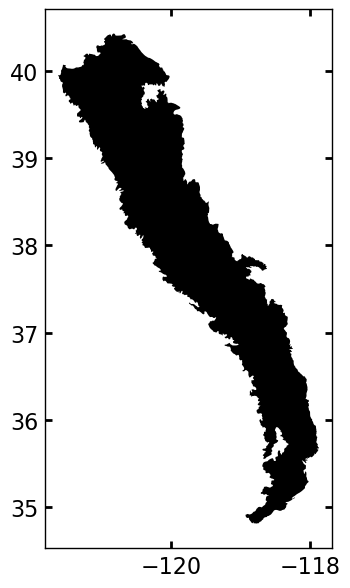

In [13]:
swei = categs.mean(dim = 'gcm').swei.load()

In [57]:
bounds = {'SN': [-122,-118,34.7,41],
        'MR': [-114.3, -104, 42, 49]}

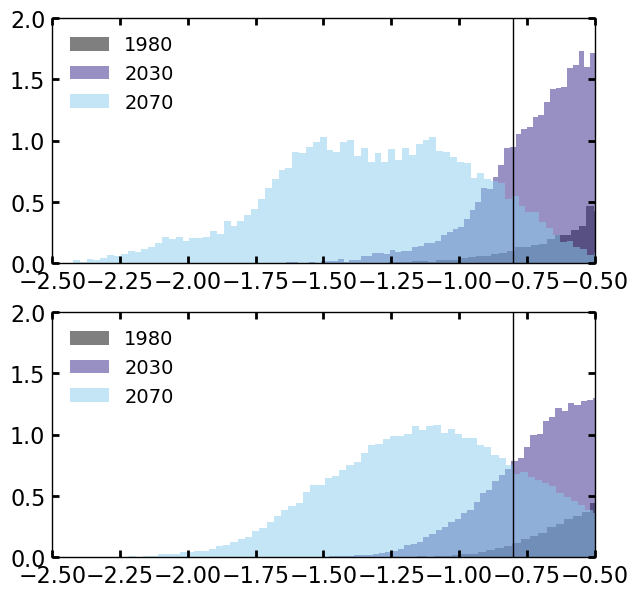

In [74]:
fig, axs = plt.subplots(2,1)

maxsnow = xr.open_dataset(f'/glade/campaign/uwyo/wyom0112/berkeley/allsnowmax_BC_{domain}.nc').rename({'__xarray_dataarray_variable__':'swe'})
swemask = maxsnow.sel(time = slice(maxsnow.time[0], maxsnow.time[20])).mean(dim = 'time').mean(dim = 'gcm').swe > 40
swemask = swemask.rename({'lat2d':'lat', 'lon2d':'lon'})
landmask = coords['LANDMASK'][0].rename({'south_north':'lat', 'west_east':'lon'})
fns = glob.glob(f'/glade/campaign/uwyo/wyom0112/berkeley/categs_snow_*_{domain}_BC.nc')
categs = xr.open_mfdataset(fns, combine = 'nested', concat_dim = 'gcm').where(landmask).where(swemask)
regions = ['SN', 'MR']

for i,region in enumerate(regions):
    ax = axs[i]
    lonmin, lonmax, latmin, latmax = bounds[region]
    latlonmask = (swei.XLAT > latmin) & (swei.XLAT < latmax) & (swei.XLONG > lonmin) & (swei.XLONG < lonmax)
    myswei = swei.where(latlonmask)
    for year in [y1,y3,y5]:
        data = myswei.sel(year = slice(year, year+inc)) - np.nanmean(myswei.sel(year = slice(y1, y1+inc)))
        ax.hist(data.values.flatten(), alpha = 0.5, bins = 100, label = year, density = True)
        
    
    ax.set_xlim((-2.5,-0.5))
    ax.legend()
    ax.vlines(-0.8,0,2)
    ax.set_ylim((0,2))
plt.show()



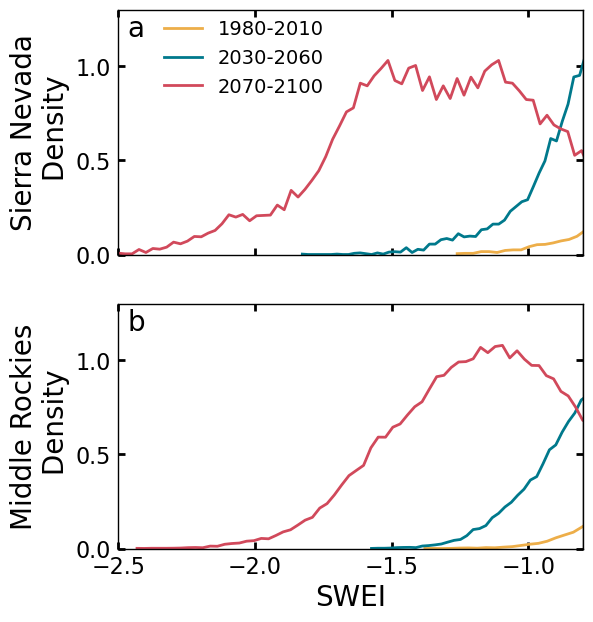

In [120]:
fig, axs = plt.subplots(2,1, sharex = True, figsize = (6,7))

colors = ['#E28413', '#00798C', '#6369D1']
colors = ['#EDAE49', '#00798C', '#D1495B']
regnames = ['Sierra Nevada', 'Middle Rockies']
maxsnow = xr.open_dataset(f'/glade/campaign/uwyo/wyom0112/berkeley/allsnowmax_BC_{domain}.nc').rename({'__xarray_dataarray_variable__':'swe'})
swemask = maxsnow.sel(time = slice(maxsnow.time[0], maxsnow.time[20])).mean(dim = 'time').mean(dim = 'gcm').swe > 40
swemask = swemask.rename({'lat2d':'lat', 'lon2d':'lon'})
landmask = coords['LANDMASK'][0].rename({'south_north':'lat', 'west_east':'lon'})
fns = glob.glob(f'/glade/campaign/uwyo/wyom0112/berkeley/categs_snow_*_{domain}_BC.nc')
categs = xr.open_mfdataset(fns, combine = 'nested', concat_dim = 'gcm').where(landmask).where(swemask)
regions = ['SN', 'MR']

for i,region in enumerate(regions):
    ax = axs[i]
    lonmin, lonmax, latmin, latmax = bounds[region]
    latlonmask = (swei.XLAT > latmin) & (swei.XLAT < latmax) & (swei.XLONG > lonmin) & (swei.XLONG < lonmax)
    myswei = swei.where(latlonmask)
    for iy, year in enumerate([y1,y3,y5]):
        data = myswei.sel(year = slice(year, year+inc)) - np.nanmean(myswei.sel(year = slice(y1, y1+inc)))
        data = data.values.flatten()
        data = data[~np.isnan(data)]
        hist, bins = np.histogram(data, bins=100, density=True)
        ax.plot(bins[:-1], hist, alpha=1, label=f'{year}-{year+inc}', color = colors[iy], linewidth = 2)
        
    ax.set_xlim((-2.5,-0.8))
    ax.vlines(-0.8,0,2)
    ax.set_ylim((0,1.3))
    ax.set_ylabel(f'{regnames[i]}\n Density')

    ax.text(0.02,0.89, chr(97 + i), transform = ax.transAxes)
    
axs[00].legend(loc = 'upper left', bbox_to_anchor = [0.06,1.03]) 
axs[1].set_xlabel('SWEI')
plt.show()
fig.savefig('../figures/dis.jpg', dpi = 400)


In [46]:
reg = 'SN'


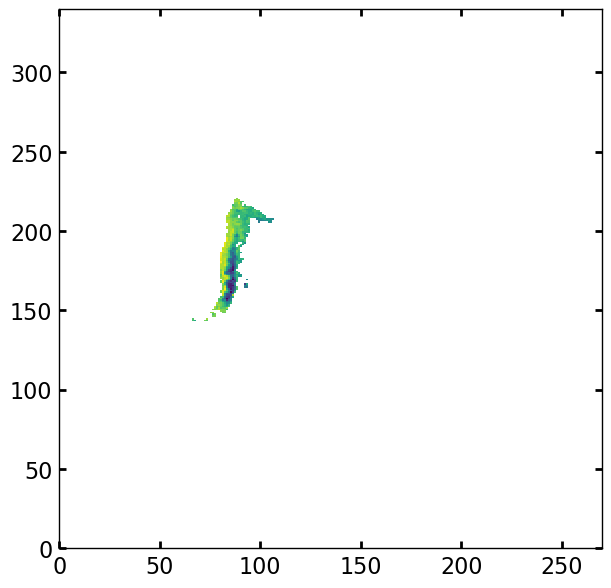

In [47]:
plt.pcolormesh(swei.where(latlonmask).sel(year = 2000))